In [1]:
import pandas as pd
import bnlearn as bn

In [2]:
data = pd.read_csv("preprocessing/data.csv")

In [3]:
X = data.drop(columns=['class'])
Y = data['class']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tr, X_ts, Y_tr, Y_ts = train_test_split(X,Y,test_size=0.2,shuffle=True)
Xc = X_ts.filter(['alcohol', 'alcalinity', 'flav', 'clr_intensity', 'hue', 'proline'])

data = pd.concat([X_tr,Y_tr],axis=1)

In [5]:
A = bn.structure_learning.fit(df=data,methodtype='hc',root_node='class',scoretype='k2')

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [6]:
A['adjmat']

target,alcohol,malicacid,ash,alcalinity,Mg,phenols,flav,nonflav,proantho,clr_intensity,hue,0D280_0D315,proline,class
source,,,,,,,,,,,,,,
alcohol,False,True,True,False,False,False,False,True,True,False,True,False,False,False
malicacid,False,False,False,False,False,False,False,True,False,False,True,False,False,False
ash,False,True,False,True,True,False,False,True,True,False,True,False,False,False
alcalinity,False,True,False,False,False,False,False,True,True,False,True,False,False,False
Mg,False,True,False,False,False,False,False,True,True,False,True,False,False,False
phenols,False,True,False,False,False,False,False,True,True,False,True,False,False,False
flav,False,True,False,False,False,True,False,True,True,False,True,True,False,True
nonflav,False,False,False,False,False,False,False,False,False,False,False,False,False,False
proantho,False,True,False,False,False,False,False,True,False,False,True,False,False,False


In [7]:
A_param = bn.parameter_learning.fit(model=A,df=data,methodtype='bayes',scoretype='k2')
bn.print_CPD(A_param,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.


[bnlearn] >CPD of alcohol:
+--------------+-----+---------------------+
| class        | ... | class(3)            |
+--------------+-----+---------------------+
| alcohol(0.0) | ... | 0.15555555555555556 |
+--------------+-----+---------------------+
| alcohol(1.0) | ... | 0.5111111111111111  |
+--------------+-----+---------------------+
| alcohol(2.0) | ... | 0.3333333333333333  |
+--------------+-----+---------------------+
[bnlearn] >CPD of malicacid:
+----------------+-----+--------------------+
| 0D280_0D315    | ... | 0D280_0D315(2.0)   |
+----------------+-----+--------------------+
| Mg             | ... | Mg(2.0)            |
+----------------+-----+--------------------+
| alcalinity     | ... | alcalinity(1.0)    |
+----------------+-----+--------------------+
| alcohol        | ... | alcohol(2.0)       |
+----------------+-----+--------------------+
| ash            | ... | ash(1.0)           |
+----------------+-----+--------------------+
| class          | ... | class(3)

{'alcohol':    alcohol  class         p
 0      0.0      1  0.018868
 1      0.0      2  0.735849
 2      0.0      3  0.155556
 3      1.0      1  0.283019
 4      1.0      2  0.226415
 5      1.0      3  0.511111
 6      2.0      1  0.698113
 7      2.0      2  0.037736
 8      2.0      3  0.333333,
 'malicacid':         malicacid  0D280_0D315   Mg  alcalinity  alcohol  ash  class  \
 0             0.0          0.0  0.0         0.0      0.0  0.0      1   
 1             0.0          0.0  0.0         0.0      0.0  0.0      1   
 2             0.0          0.0  0.0         0.0      0.0  0.0      1   
 3             0.0          0.0  0.0         0.0      0.0  0.0      1   
 4             0.0          0.0  0.0         0.0      0.0  0.0      1   
 ...           ...          ...  ...         ...      ...  ...    ...   
 104971        2.0          2.0  2.0         1.0      2.0  1.0      3   
 104972        2.0          2.0  2.0         1.0      2.0  1.0      3   
 104973        2.0          

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


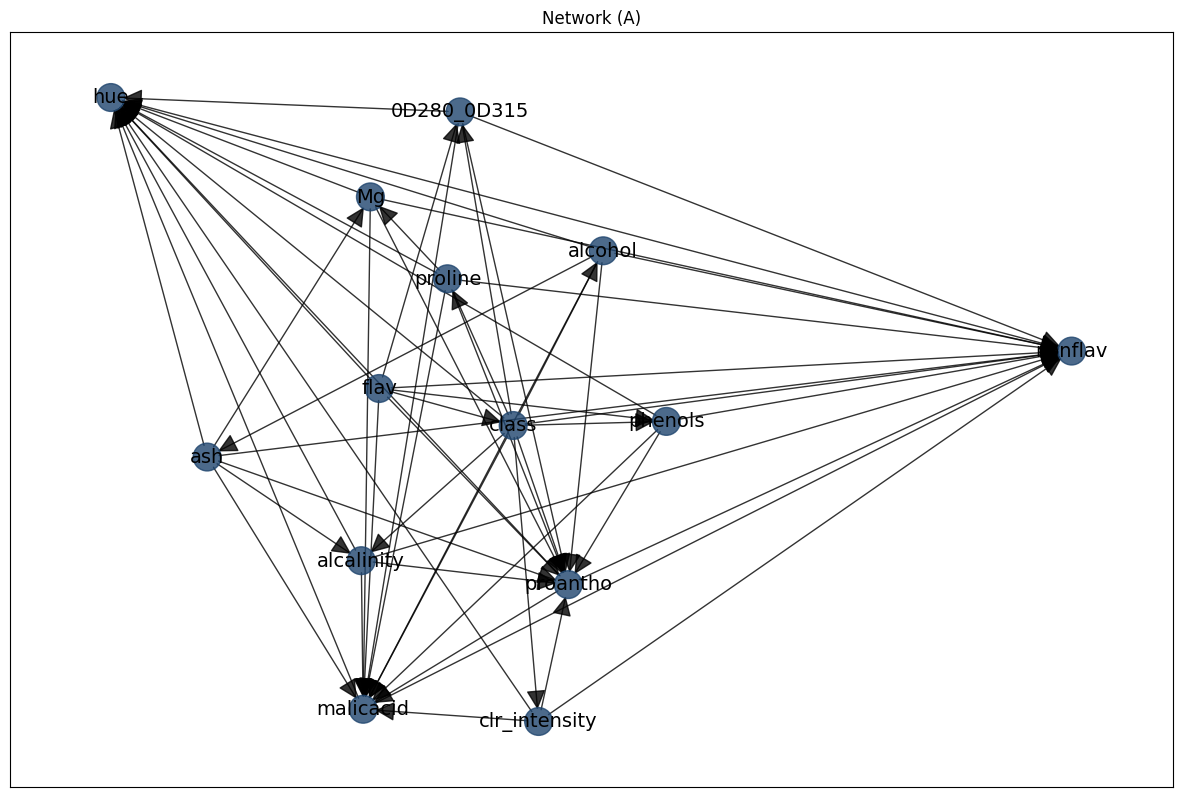

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([0.21389493, 0.2270737 ]),
  'malicacid': array([-0.18898208, -0.48587234]),
  'ash': array([-0.4508284 , -0.09365842]),
  'alcalinity': array([-0.19212996, -0.25481141]),
  'Mg': array([-0.17684828,  0.31092026]),
  'phenols': array([ 0.31982177, -0.03824238]),
  'flav': array([-0.1620438 ,  0.01292928]),
  'nonflav': array([1.        , 0.07111509]),
  'proantho': array([ 0.15518882, -0.29199962]),
  'clr_intensity': array([ 0.10540337, -0.50485522]),
  'hue': array([-0.61239538,  0.46540856]),
  '0D280_0D315': array([-0.02634692,  0.44307218]),
  'proline': array([-0.04750684,  0.18355933]),
  'class': array([ 0.06277277, -0.04463902])},
 'G': <networkx.classes.digraph.DiGraph at 0x28a6c6860>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_si

In [8]:
bn.plot(model=A_param,node_size=400,title='Network (A)')

In [9]:
B = bn.independence_test(A_param, data, test='chi_square', alpha=0.005, prune=True)

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [alcohol <-> malicacid] [P=0.00533471] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [alcohol <-> ash] [P=0.00661187] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [alcohol <-> nonflav] [P=0.148587] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [alcohol <-> proantho] [P=0.0187397] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [alcohol <-> hue] [P=0.06916] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [ash <-> malicacid] [P=0.00688542] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [ash <-> nonflav] [P=0.23547] is excluded because it was not significant (P<0.01) with [chi_square]
[bnlearn] >Edge [ash <-> proantho] [P=0.701016] is excluded because it was not significant (P<0.01) with [ch

[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


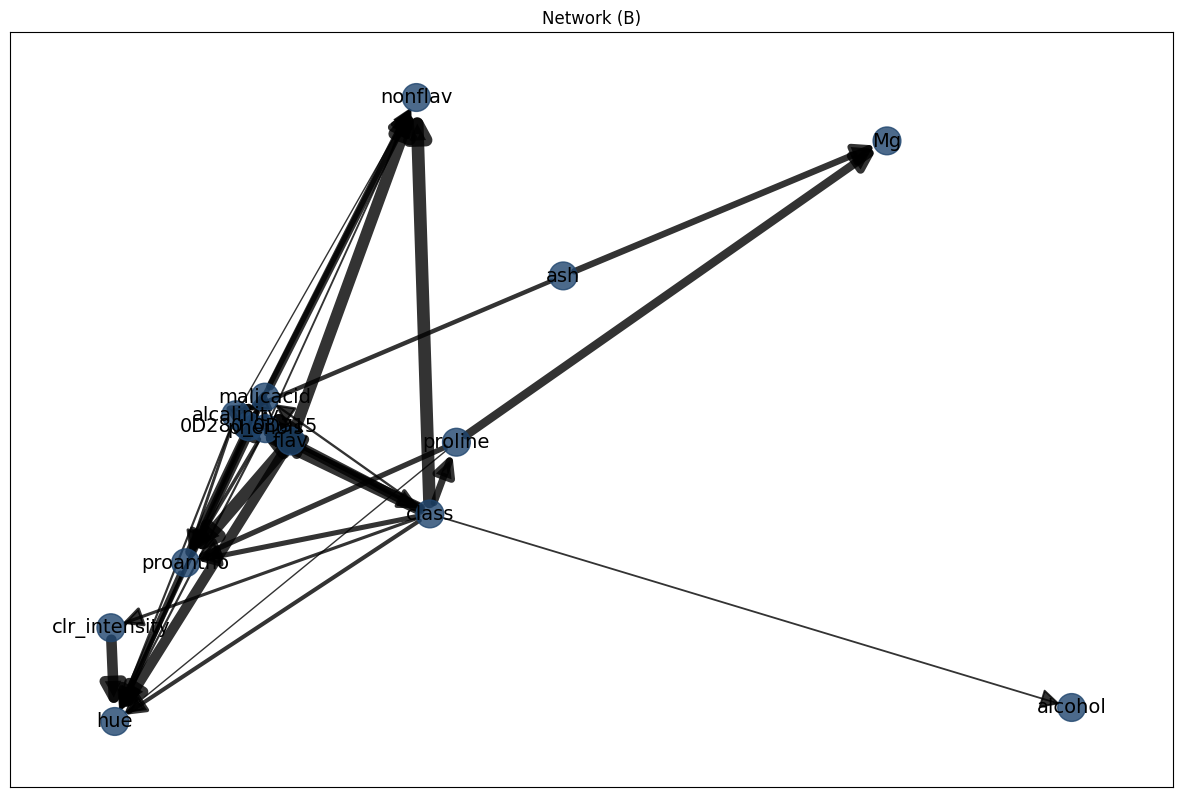

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([ 1.        , -0.40649455]),
  'malicacid': array([-0.19386357,  0.06994901]),
  'ash': array([0.24777823, 0.25612681]),
  'alcalinity': array([-0.23666644,  0.04291597]),
  'Mg': array([0.72680895, 0.46343486]),
  'phenols': array([-0.19271643,  0.02161741]),
  'flav': array([-0.15545142,  0.00267593]),
  'nonflav': array([0.03041953, 0.52999941]),
  'proantho': array([-0.31103466, -0.18431543]),
  'clr_intensity': array([-0.42162018, -0.28402088]),
  'hue': array([-0.41584264, -0.42798852]),
  '0D280_0D315': array([-0.21788892,  0.0246361 ]),
  'proline': array([0.08969471, 0.0007762 ]),
  'class': array([ 0.05038285, -0.10931233])},
 'G': <networkx.classes.digraph.DiGraph at 0x2a67b4e20>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'malicacid': {'node_color': '#1f456e', 'node_size': 800},
  'ash': {'node_color': '#1f456e', 'node_size':

In [10]:
bn.plot(model=B,node_size=400,title='Network (B)')

In [11]:
A_1 = bn.structure_learning.fit(df=data,methodtype='tan',class_node='class',root_node='alcohol',scoretype='k2')

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [tan]


Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


In [12]:
A_1param = bn.parameter_learning.fit(model=A_1,df=data,methodtype='bayes',scoretype='k2')
bn.print_CPD(A_1param,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of alcohol:
+--------------+-----+---------------------+
| class        | ... | class(3)            |
+--------------+-----+---------------------+
| alcohol(0.0) | ... | 0.15555555555555556 |
+--------------+-----+---------------------+
| alcohol(1.0) | ... | 0.5111111111111111  |
+--------------+-----+---------------------+
| alcohol(2.0) | ... | 0.3333333333333333  |
+--------------+-----+---------------------+
[bnlearn] >CPD of Mg:
+---------+--------------------+-----+---------------------+
| alcohol | alcohol(0.0)       | ... | alcohol(2.0)        |
+---------+--------------------+-----+---------------------+
| class   | class(1)           | ... | class(3)            |
+---------+--------------------+-----+---------------------+
| Mg(0.0) | 0.3333333333333333 | ... | 0.470588

{'alcohol':    alcohol  class         p
 0      0.0      1  0.018868
 1      0.0      2  0.735849
 2      0.0      3  0.155556
 3      1.0      1  0.283019
 4      1.0      2  0.226415
 5      1.0      3  0.511111
 6      2.0      1  0.698113
 7      2.0      2  0.037736
 8      2.0      3  0.333333,
 'Mg':      Mg  alcohol  class         p
 0   0.0      0.0      1  0.333333
 1   0.0      0.0      2  0.536585
 2   0.0      0.0      3  0.444444
 3   0.0      1.0      1  0.117647
 4   0.0      1.0      2  0.571429
 5   0.0      1.0      3  0.120000
 6   0.0      2.0      1  0.051282
 7   0.0      2.0      2  0.500000
 8   0.0      2.0      3  0.470588
 9   1.0      0.0      1  0.333333
 10  1.0      0.0      2  0.243902
 11  1.0      0.0      3  0.333333
 12  1.0      1.0      1  0.529412
 13  1.0      1.0      2  0.214286
 14  1.0      1.0      3  0.400000
 15  1.0      2.0      1  0.307692
 16  1.0      2.0      2  0.250000
 17  1.0      2.0      3  0.352941
 18  2.0      0.0      1  0

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


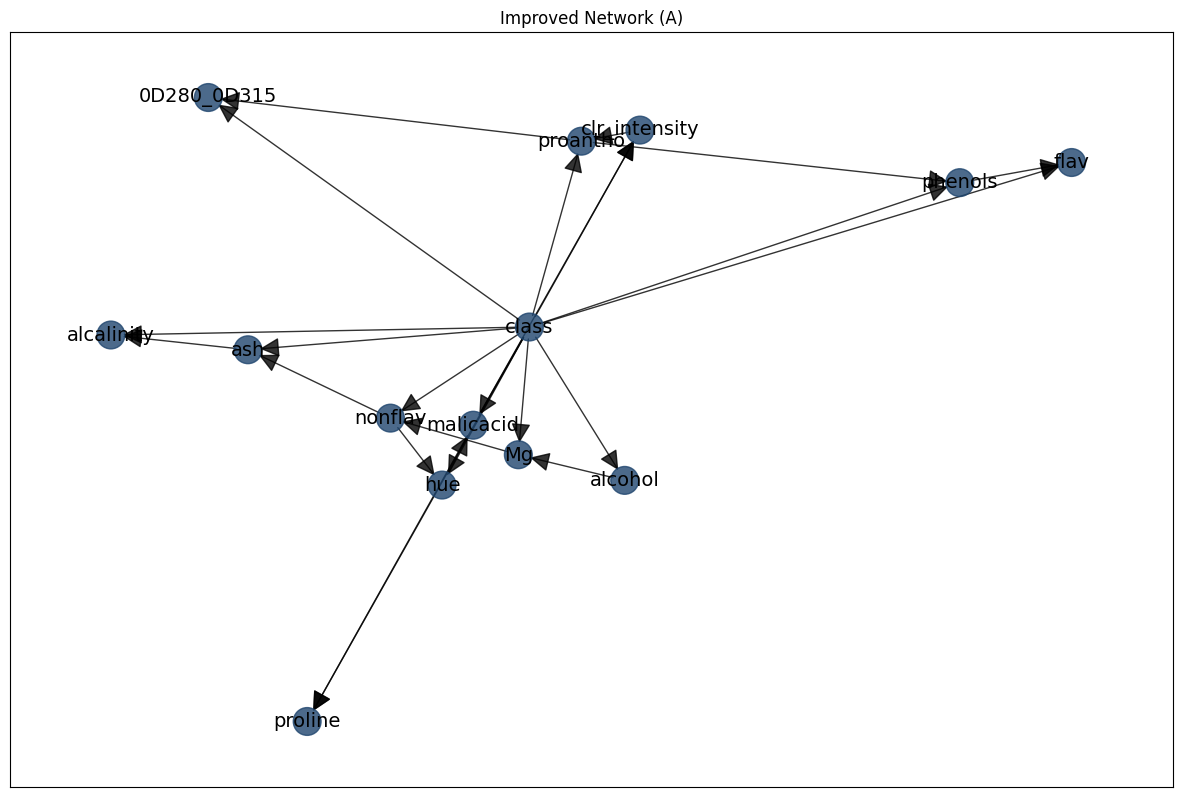

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([ 0.20773233, -0.37264205]),
  'Mg': array([ 0.01917546, -0.30623105]),
  'nonflav': array([-0.20751022, -0.21142901]),
  'ash': array([-0.46015133, -0.0343778 ]),
  'hue': array([-0.11596902, -0.38474443]),
  'alcalinity': array([-0.70313132,  0.00385741]),
  'malicacid': array([-0.06075383, -0.22976871]),
  'clr_intensity': array([0.23475657, 0.53442837]),
  'proline': array([-0.35514764, -0.99694491]),
  'proantho': array([0.13096188, 0.50569098]),
  'phenols': array([0.80168296, 0.39834079]),
  '0D280_0D315': array([-0.53039859,  0.61879508]),
  'flav': array([1.        , 0.45049892]),
  'class': array([0.03875274, 0.0245264 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x28a72faf0>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Mg': {'node_color': '#1f456e', 'node_size': 800},
  'nonflav': {'node_color': '#1f456e', 'node_size': 800}

In [13]:
bn.plot(model=A_1param,node_size=400,title='Improved Network (A)')

In [55]:
from sklearn.feature_selection import SelectFromModel,chi2,f_classif,SelectKBest
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C=0.05,penalty='l2',dual=False)
model = SelectFromModel(lsvc.fit(X_tr,Y_tr),prefit=True)

X_fs = pd.DataFrame(model.transform(X_tr),columns=X_tr.columns[model.get_support()])

data_fs = pd.concat([X_fs,Y_tr],axis=1)

In [56]:
data_fs

,alcohol,alcalinity,flav,clr_intensity,hue,0D280_0D315,proline,class
0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
2,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0
4,2.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [77]:
C = bn.structure_learning.fit(df=data_fs,methodtype='hc',scoretype='k2')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [78]:
C['adjmat']

target,alcohol,alcalinity,flav,clr_intensity,hue,0D280_0D315,proline,class
source,,,,,,,,
alcohol,False,False,True,False,True,False,True,False
alcalinity,False,False,False,False,True,False,False,False
flav,False,True,False,False,True,True,False,False
clr_intensity,True,True,False,False,True,True,False,False
hue,False,False,False,False,False,False,False,False
0D280_0D315,False,False,False,False,True,False,False,False
proline,False,True,True,False,True,False,False,False
class,False,False,False,False,True,False,False,False


In [80]:
C_param = bn.parameter_learning.fit(model=C,df=data_fs,methodtype='ml',scoretype='bdeu')
bn.print_CPD(C_param,verbose=0)

[bnlearn] >Parameter learning> Computing parameters using [ml]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of alcohol:
+---------------+-----+--------------------+
| clr_intensity | ... | clr_intensity(2.0) |
+---------------+-----+--------------------+
| alcohol(0.0)  | ... | 0.1                |
+---------------+-----+--------------------+
| alcohol(1.0)  | ... | 0.325              |
+---------------+-----+--------------------+
| alcohol(2.0)  | ... | 0.575              |
+---------------+-----+--------------------+
[bnlearn] >CPD of flav:
+-----------+---------------------+-----+----------------------+
| alcohol   | alcohol(0.0)        | ... | alcohol(2.0)         |
+-----------+---------------------+-----+----------------------+
| proline   | proline(0.0)        | ... | proline(1.0)         |
+-----------+---------------------+-----+----------------------+
| flav(0.0) | 0.642857142857

{'alcohol':    alcohol  clr_intensity         p
 0      0.0            0.0  0.781250
 1      0.0            1.0  0.153846
 2      0.0            2.0  0.100000
 3      1.0            0.0  0.187500
 4      1.0            1.0  0.538462
 5      1.0            2.0  0.325000
 6      2.0            0.0  0.031250
 7      2.0            1.0  0.307692
 8      2.0            2.0  0.575000,
 'flav':     flav  alcohol  proline         p
 0    0.0      0.0      0.0  0.642857
 1    0.0      0.0      1.0  0.857143
 2    0.0      1.0      0.0  0.842105
 3    0.0      1.0      1.0  0.380952
 4    0.0      2.0      0.0  1.000000
 5    0.0      2.0      1.0  0.037037
 6    1.0      0.0      0.0  0.357143
 7    1.0      0.0      1.0  0.142857
 8    1.0      1.0      0.0  0.157895
 9    1.0      1.0      1.0  0.619048
 10   1.0      2.0      0.0  0.000000
 11   1.0      2.0      1.0  0.962963,
 'hue':       hue  0D280_0D315  alcalinity  alcohol  class  clr_intensity  flav  \
 0     0.0          0.0         

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


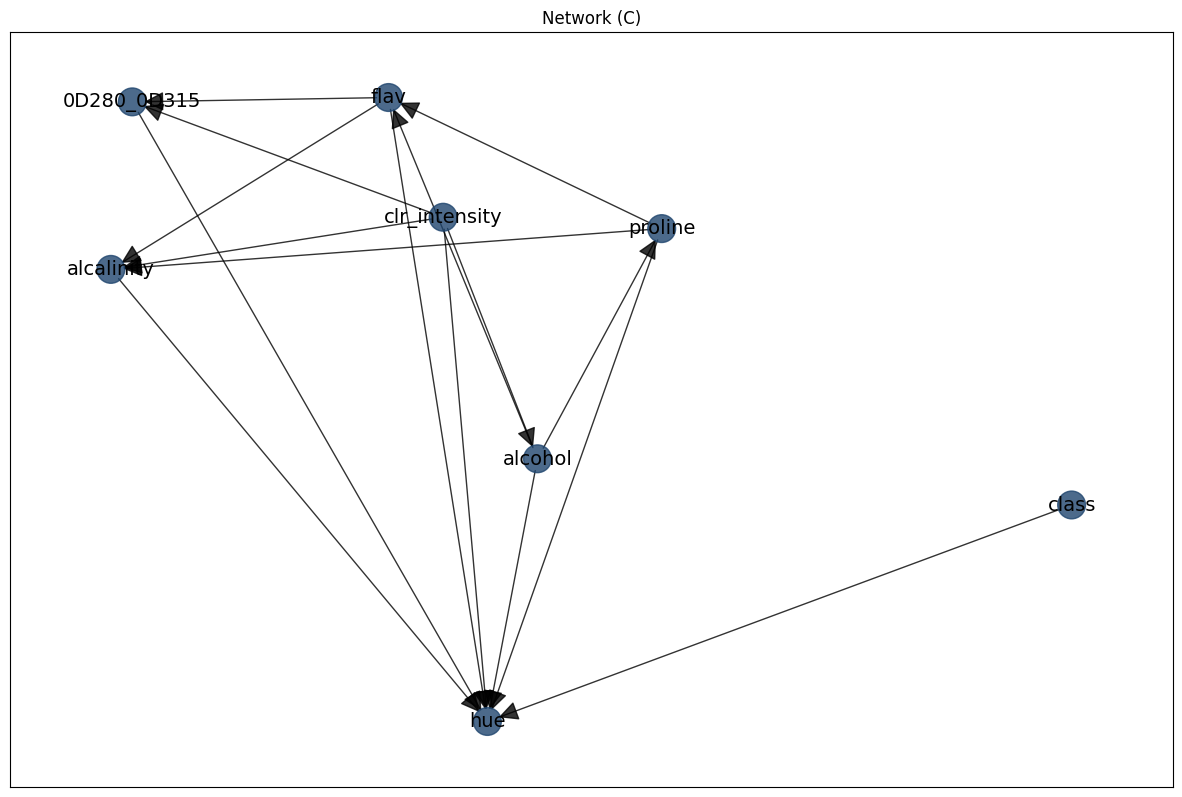

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'alcohol': array([ 0.09848521, -0.33233466]),
  'alcalinity': array([-0.62155678,  0.13806813]),
  'flav': array([-0.152883  ,  0.56501584]),
  'clr_intensity': array([-0.06072655,  0.2675958 ]),
  'hue': array([ 0.01396594, -0.98490037]),
  '0D280_0D315': array([-0.58541351,  0.55422667]),
  'proline': array([0.3081287 , 0.23939686]),
  'class': array([ 1.        , -0.44706826])},
 'G': <networkx.classes.digraph.DiGraph at 0x28d97e800>,
 'node_properties': {'alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'alcalinity': {'node_color': '#1f456e', 'node_size': 800},
  'flav': {'node_color': '#1f456e', 'node_size': 800},
  'clr_intensity': {'node_color': '#1f456e', 'node_size': 800},
  'hue': {'node_color': '#1f456e', 'node_size': 800},
  '0D280_0D315': {'node_color': '#1f456e', 'node_size': 800},
  'proline': {'node_color': '#1f456e', 'node_size': 800},
  'class': {'node_color': '#1

In [81]:
bn.plot(model=C_param,node_size=400,title='Network (C)')

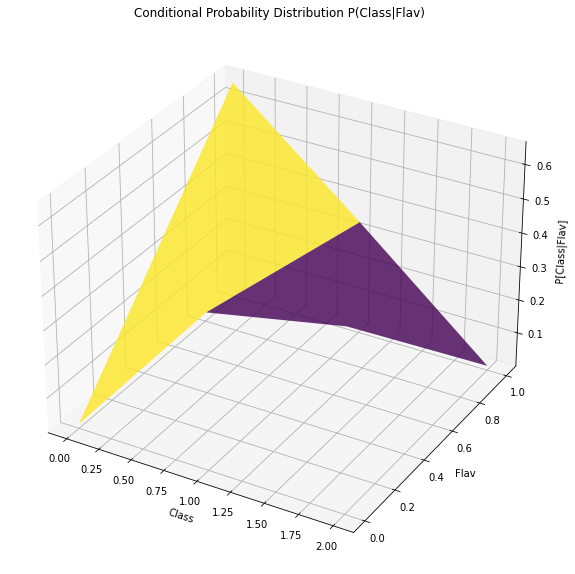

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cpd_values = np.array([[0.0109, 0.4565, 0.5326],[0.6521, 0.3370, 0.0108]])
b_vals = [0,1,2]
a_vals = [0,1]

fig = plt.figure(figsize=(15,10))
Cl,F1 = np.meshgrid(b_vals,a_vals)
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(Cl, F1, cpd_values, cmap='viridis', alpha=0.8)

ax.set_xlabel('Class')
ax.set_ylabel('Flav')
ax.set_zlabel('P[Class|Flav]')
ax.set_title('Conditional Probability Distribution P(Class|Flav)')
plt.show()

In [83]:
test = [{'alcohol': 0.0, 'malicacid': 1.0, 'ash': 0.0, 'alcalinity': 0.0, 'Mg': 2.0, 'phenols': 1.0, 'flav': 1.0, 'nonflav': 1.0, 'proantho': 1.0, 'clr_intensity': 1.0, 'hue': 0.0, '0D280_0D315': 2.0, 'proline': 1.0},
{'alcohol': 0.0, 'malicacid': 1.0, 'ash': 1.0, 'alcalinity': 0.0, 'Mg': 1.0, 'phenols': 1.0, 'flav': 1.0, 'nonflav': 0.0, 'proantho': 1.0, 'clr_intensity': 2.0, 'hue': 2.0, '0D280_0D315': 2.0, 'proline': 0.0},
{'alcohol': 1.0, 'malicacid': 0.0, 'ash': 1.0, 'alcalinity': 1.0, 'Mg': 2.0, 'phenols': 2.0, 'flav': 1.0, 'nonflav': 2.0, 'proantho': 2.0, 'clr_intensity': 1.0, 'hue': 0.0, '0D280_0D315': 1.0, 'proline': 1.0},
{'alcohol': 1.0, 'malicacid': 2.0, 'ash': 1.0, 'alcalinity': 1.0, 'Mg': 2.0, 'phenols': 1.0, 'flav': 0.0, 'nonflav': 2.0, 'proantho': 1.0, 'clr_intensity': 1.0, 'hue': 0.0, '0D280_0D315': 2.0, 'proline': 0.0}]

In [84]:
for sample in test:
    bn.inference.fit(model=A_param,variables=['class'],evidence=sample)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.505045  |
+----+---------+-----------+
|  1 |       2 | 0.489428  |
+----+---------+-----------+
|  2 |       3 | 0.0055266 |
+----+---------+-----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.0575217 |
+----+---------+-----------+
|  1 |       2 | 0.925389  |
+----+---------+-----------+
|  2 |       3 | 0.0170892 |
+----+---------+-----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+======

In [85]:
for sample in test:
    bn.inference.fit(model=B,variables=['class'],evidence=sample)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.505045  |
+----+---------+-----------+
|  1 |       2 | 0.489428  |
+----+---------+-----------+
|  2 |       3 | 0.0055266 |
+----+---------+-----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.0575217 |
+----+---------+-----------+
|  1 |       2 | 0.925389  |
+----+---------+-----------+
|  2 |       3 | 0.0170892 |
+----+---------+-----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+======

In [86]:
for sample in test:
    bn.inference.fit(model=A_1param,variables=['class'],evidence=sample)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-------------+
|    |   class |           p |
+====+=========+=============+
|  0 |       1 | 0.30672     |
+----+---------+-------------+
|  1 |       2 | 0.693092    |
+----+---------+-------------+
|  2 |       3 | 0.000188279 |
+----+---------+-------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+------------+
|    |   class |          p |
+====+=========+============+
|  0 |       1 | 0.304583   |
+----+---------+------------+
|  1 |       2 | 0.692018   |
+----+---------+------------+
|  2 |       3 | 0.00339868 |
+----+---------+------------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class

In [95]:
test_c = [{'alcohol': 0.0,
  'alcalinity': 1.0,
  'flav': 0.0,
  'clr_intensity': 1.0,
  'hue': 0.0,
  'proline': 1.0},
 {'alcohol': 0.0,
  'alcalinity': 1.0,
  'flav': 1.0,
  'clr_intensity': 2.0,
  'hue': 2.0,
  'proline': 0.0},
 {'alcohol': 1.0,
  'alcalinity': 1.0,
  'flav': 1.0,
  'clr_intensity': 1.0,
  'hue': 0.0,
  'proline': 1.0},
 {'alcohol': 1.0,
  'alcalinity': 1.0,
  'flav': 0.0,
  'clr_intensity': 1.0,
  'hue': 0.0,
  'proline': 0.0}]
    

for sample in test_c:
    bn.inference.fit(model=C_param,variables=['class'],evidence=sample)

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+-----------+
|    |   class |         p |
+====+=========+===========+
|  0 |       1 | 0.266709  |
+----+---------+-----------+
|  1 |       2 | 0.674616  |
+----+---------+-----------+
|  2 |       3 | 0.0586759 |
+----+---------+-----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.621547 |
+----+---------+----------+
|  1 |       2 | 0.241713 |
+----+---------+----------+
|  2 |       3 | 0.13674  |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+=======

In [96]:
A_acc = accuracy_score(y_true=Y_ts,y_pred=bn.predict(model=A_param,df=X_ts,variables=['class'],to_df=True,method='max')['class'])
B_acc = accuracy_score(y_true=Y_ts,y_pred=bn.predict(model=B,df=X_ts,variables=['class'],to_df=True,method='max')['class'])
A_1acc = accuracy_score(y_true=Y_ts,y_pred=bn.predict(model=A_1param,df=X_ts,variables=['class'],to_df=True,method='max')['class'])
C_acc = accuracy_score(y_true=Y_ts,y_pred=bn.predict(model=C_param,df=Xc,variables=['class'],to_df=True,method='max')['class'])

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 161.04it/s]


[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 180.20it/s]


[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 855.47it/s]


[bnlearn]> Remaining columns for inference: 6


100%|██████████| 30/30 [00:00<00:00, 1300.67it/s]


In [97]:
A_acc

0.9444444444444444

In [98]:
B_acc

0.9444444444444444

In [99]:
A_1acc

0.9444444444444444

In [100]:
C_acc

0.3611111111111111